The dataset contains data concerning pavement durability. We have measurement of the change in rut (y) of 31 experimental asphalt pavements that were prepared under different conditions specfied by the values of five explanatory variables.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
import phik

In [4]:
#Reading the dataset
df1=pd.read_csv("dataset1.csv")

#### Finding preliminary relationships

In [5]:
#Calculating correlations between variables
X=df1.drop('y',axis=1)
y=df1['y']
dic={"Variable":list(X.columns),
    "Pearson":list(X.corrwith(y,method='pearson')),
    'spearman':list(X.corrwith(y,method='spearman')),
    "kendall":list(X.corrwith(y,method='kendall')),
    "Phik":pd.DataFrame(df1.phik_matrix()).iloc[0,1:]
}
pd.DataFrame(dic)

interval columns not set, guessing: ['y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6']


,Variable,Pearson,spearman,kendall,Phik
x1,x1,-0.557633,-0.956636,-0.840175,0.000000
x2,x2,0.183674,0.233431,0.156015,0.366970
x3,x3,0.210202,0.207391,0.161407,0.000000
x4,x4,0.269161,0.350940,0.240461,0.226447
x5,x5,-0.423922,-0.387981,-0.273707,0.721964
x6,x6,-0.810900,-0.866113,-0.719195,1.000000


It can be seen that x2, x5 and x6 are related to the target variable according to Phik coefficient. <br>
Likewise, pearson shows that x1, x5 and x6 are more related to the target variables.

x1 doesnot have a linear relation with y


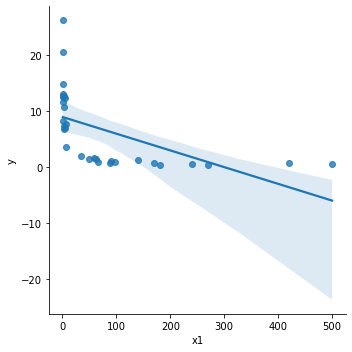

In [6]:
sns.lmplot(data=df1,x='x1',y='y')
print('x1 doesnot have a linear relation with y')

x2 has a weak linear relation with y


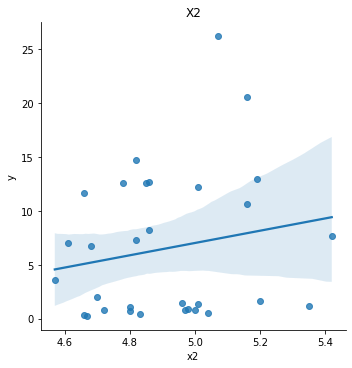

In [12]:
#fig, ax=plt.subplots(2,2,figsize=(20,18))
sns.lmplot(data=df1,x='x2',y='y').set(title="X2")
print('x2 has a weak linear relation with y')

X3 seems to have a liner relationship with Y


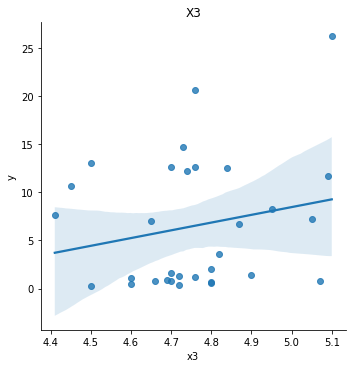

In [11]:
sns.lmplot(data=df1,x='x3',y='y').set(title="X3")
print('X3 seems to have a liner relationship with Y')

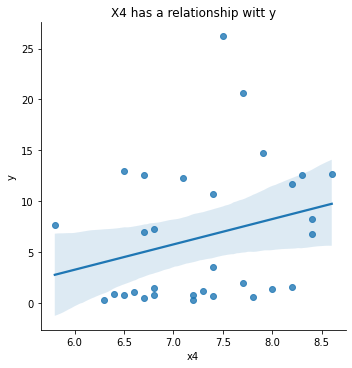

In [10]:
sns.lmplot(data=df1,x='x4',y='y').set(title="X4 has a relationship witt y")

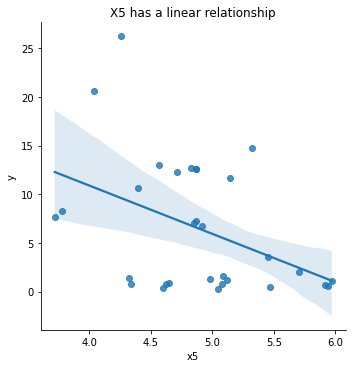

In [15]:

sns.lmplot(data=df1,x='x5',y='y').set(title="X5 has a linear relationship")

#### Feature engineering

[Text(0.5, 1.0, 'Original scale')]

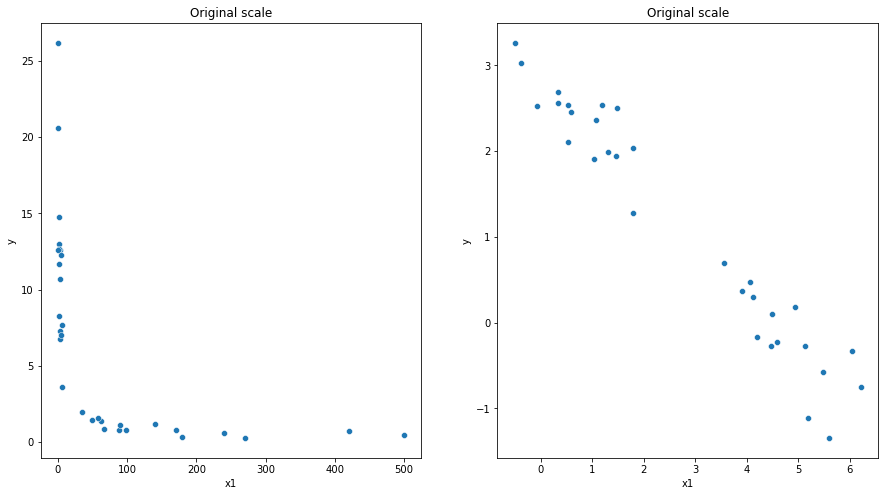

In [16]:
fig, ax=plt.subplots(1,2,figsize=(15,8))
sns.scatterplot(data=df1,x='x1',y='y',ax=ax[0]).set(title="Original scale")
sns.scatterplot(data=df1,x=np.log(df1.x1),y=np.log(df1.y),ax=ax[1]).set(title="Original scale")

 x1 and y showed no concrete relation among themselves. LogX1 and LogY definately have linear relationship as evident from the scatter plot

In [17]:
df_trans=df1.copy(deep=True) 
df_trans.x1=np.log(df1.x1)
df_trans.y=np.log(df1.y)
df_trans=df_trans.rename(columns={"x1":"LogX1","y":'LogY'})

In [18]:
df_trans.head()

,LogY,LogX1,x2,x3,x4,x5,x6
0,1.909543,1.029619,4.68,4.87,8.4,4.916,-1
1,2.564949,0.336472,5.19,4.50,6.5,4.563,-1
2,2.691243,0.336472,4.82,4.73,7.9,5.321,-1
3,2.533697,1.193922,4.85,4.76,8.3,4.865,-1
4,2.110213,0.530628,4.86,4.95,8.4,3.776,-1


#### Fitting linear regression model and evaluating

In [19]:
import statsmodels.api as sm

In [20]:
X=df_trans.drop('LogY',axis=1)
y=df_trans['LogY']
x = sm.add_constant(X)

model = sm.OLS(y, x).fit()
model.rsquared


0.9722418440438138

In [21]:
model.pvalues

const    2.317769e-02
LogX1    2.895489e-07
x2       2.349350e-04
x3       4.827312e-01
x4       5.867002e-01
x5       8.432920e-03
x6       4.619857e-02
dtype: float64

The explainatory variables that do have a significant impact on the explaining change in rut depth residuals are: <br>
1. LogX1
2. x2
3. x5
4. x6

#### Reevaluating model and retraining

In [26]:
X=df_trans.drop({'LogY','x3','x4'},axis=1)
X.head(2)

,LogX1,x2,x5,x6
0,1.029619,4.68,4.916,-1
1,0.336472,5.19,4.563,-1


In [27]:

y=df_trans['LogY']
x = sm.add_constant(X)

model = sm.OLS(y, x).fit()
print_model = model.summary()
model.rsquared

0.9707839395540011

<AxesSubplot:ylabel='Count'>

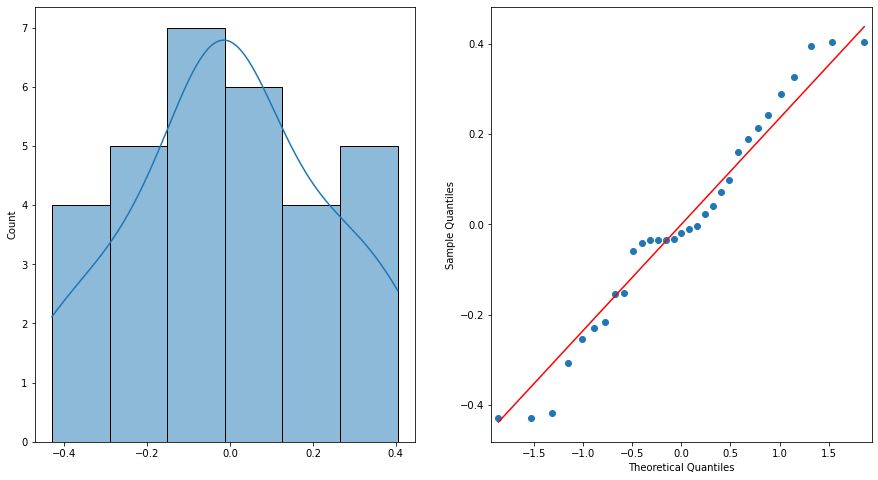

In [28]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
predictions = model.predict(x)
res=df_trans['LogY']-predictions
fig, ax=plt.subplots(1,2,figsize=(15,8))

qqplot(model.resid, line='s',ax=ax[1])
sns.histplot(res,ax=ax[0],kde=True)

Although the histogram doesnot not show a normal distrution the qq plot shoes the resudial almost in a straight line indicating the residual is nrmally distributed.

More feature engineering

In [31]:
X1=X.copy()
X1['LogX1X6']=X1.LogX1*X1.x6
X1.head()

,LogX1,x2,x5,x6,LogX1X6
0,1.029619,4.68,4.916,-1,-1.029619
1,0.336472,5.19,4.563,-1,-0.336472
2,0.336472,4.82,5.321,-1,-0.336472
3,1.193922,4.85,4.865,-1,-1.193922
4,0.530628,4.86,3.776,-1,-0.530628


In [32]:
y=df1['y']
x = sm.add_constant(X1)
model_new = sm.OLS(y, x).fit()
model_new.pvalues
# print("model WITHOUT log transformed r-square",model_nolog.rsquared)
# print("model WITH log transformed r-square",model.rsquared)

const      0.255752
LogX1      0.000009
x2         0.043344
x5         0.609070
x6         0.001077
LogX1X6    0.000023
dtype: float64

Based on model p-values, LogX1 * X6 is statistically significant. Therefore, it should be included in the model.

This short analysis tries to find relevant variables which has a significance in measuring change in rut depth